In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import glob
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import metrics
from collections import Counter
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
np.random.seed(0)
tf.random.set_seed(0)

Number of CSV files used: 30
Epoch 1/300
121/121 [==============================] - 1s 3ms/step - loss: 1.0226 - accuracy: 0.7765 - val_loss: 0.5847 - val_accuracy: 0.8684
Epoch 2/300
121/121 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.8344 - val_loss: 0.4284 - val_accuracy: 0.8684
Epoch 3/300
121/121 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8758 - val_loss: 0.3592 - val_accuracy: 0.9079
Epoch 4/300
121/121 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8940 - val_loss: 0.3706 - val_accuracy: 0.8816
Epoch 5/300
121/121 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.9089 - val_loss: 0.3186 - val_accuracy: 0.8816
Epoch 6/300
121/121 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9073 - val_loss: 0.3005 - val_accuracy: 0.9013
Epoch 7/300
121/121 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.9156 - val_loss: 

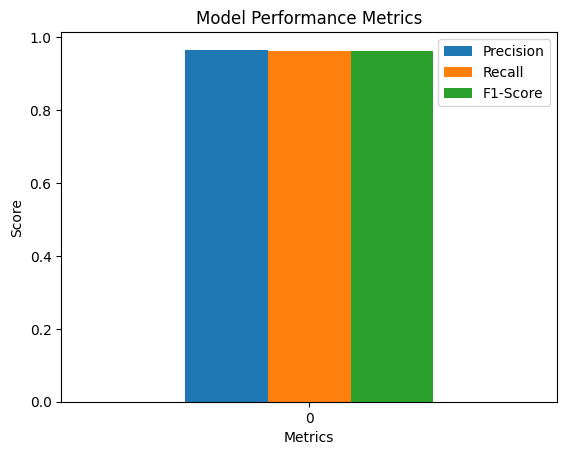

Total number of samples: 946


In [ ]:
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras import regularizers
import matplotlib.pyplot as plt
from keras.optimizers import Adamax
from keras.optimizers import Nadam

# load all csv files
path = '/content/drive/MyDrive/Data/EDA/1_5'  # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# Print the number of CSV files used
print('Number of CSV files used:', len(all_files))

# separate into input (X) and output (y) variables
X = df[['mean', 'std_dev', 'range']].values
y = df['Label'].values

# encode class values as integers
y = np_utils.to_categorical(y)

# split into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshape input data for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.005))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, epochs=300, batch_size=5, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy * 100))

# make class predictions with the model
probabilities = model.predict(X_test)
predictions = np.argmax(probabilities, axis=-1)

# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], np.argmax(y_test[i])))

# confusion matrix
print(confusion_matrix(np.argmax(y_test, axis=1), predictions))

# classification report
print(classification_report(np.argmax(y_test, axis=1), predictions))

# Calculate Precision, Recall, and F1-Score
precision = precision_score(np.argmax(y_test, axis=1), predictions, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), predictions, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), predictions, average='weighted')

print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)
print('F1-Score: %.2f' % f1)

# Plot Precision, Recall, and F1-Score
metrics_df = pd.DataFrame({'Precision': [precision], 'Recall': [recall], 'F1-Score': [f1]})
metrics_df.plot(kind='bar', rot=0)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()

# Additional print to check data usage
print('Total number of samples:', X.shape[0])


Number of CSV files used: 30
Epoch 1/300
121/121 [==============================] - 2s 5ms/step - loss: 1.0372 - accuracy: 0.7781 - val_loss: 0.6060 - val_accuracy: 0.8487
Epoch 2/300
121/121 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.8377 - val_loss: 0.4408 - val_accuracy: 0.8750
Epoch 3/300
121/121 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8791 - val_loss: 0.3675 - val_accuracy: 0.8882
Epoch 4/300
121/121 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.9007 - val_loss: 0.3691 - val_accuracy: 0.8882
Epoch 5/300
121/121 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.9056 - val_loss: 0.3241 - val_accuracy: 0.8816
Epoch 6/300
121/121 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9073 - val_loss: 0.3036 - val_accuracy: 0.9013
Epoch 7/300
121/121 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.9056 - val_loss: 

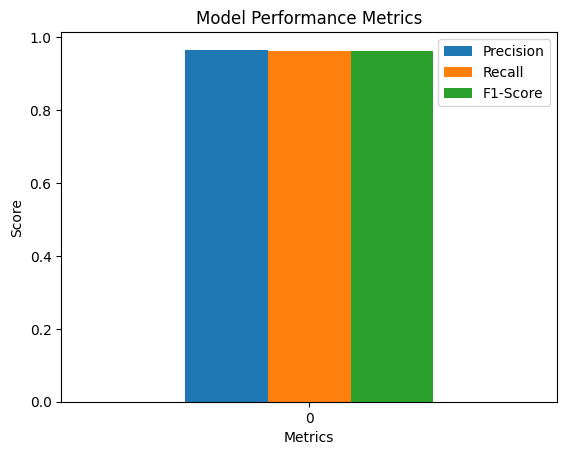

Total number of samples: 946


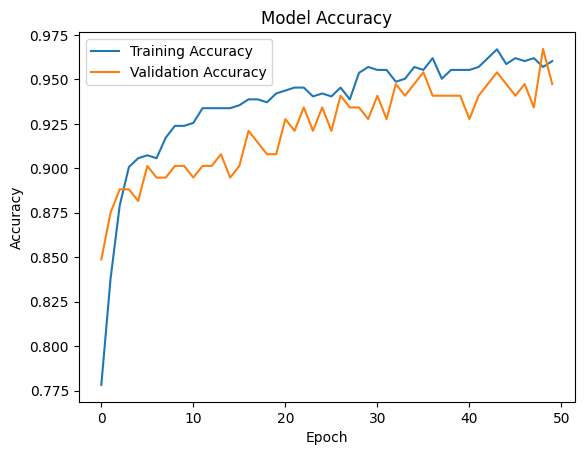

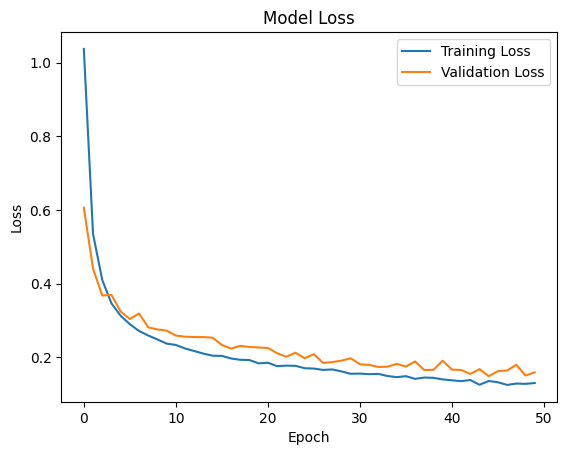

In [ ]:
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, LambdaCallback
from keras import regularizers
import matplotlib.pyplot as plt
from keras.optimizers import Adamax
from keras.optimizers import Nadam

# load all csv files
path = '/content/drive/MyDrive/Data/EDA/1_5'  # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# Print the number of CSV files used
print('Number of CSV files used:', len(all_files))

# separate into input (X) and output (y) variables
X = df[['mean', 'std_dev', 'range']].values
y = df['Label'].values

# encode class values as integers
y = np_utils.to_categorical(y)

# split into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshape input data for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.005))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

train_accuracy = []
train_loss = []
val_accuracy = []
val_loss = []

# Define a callback for tracking metrics during training
metrics_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: update_metrics(logs))

def update_metrics(logs):
    train_accuracy.append(logs['accuracy'])
    train_loss.append(logs['loss'])
    val_accuracy.append(logs['val_accuracy'])
    val_loss.append(logs['val_loss'])

model.fit(X_train, y_train, epochs=300, batch_size=5, verbose=1, validation_split=0.2, callbacks=[early_stopping, metrics_callback])

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy * 100))

# make class predictions with the model
probabilities = model.predict(X_test)
predictions = np.argmax(probabilities, axis=-1)

# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], np.argmax(y_test[i])))

# confusion matrix
print(confusion_matrix(np.argmax(y_test, axis=1), predictions))

# classification report
print(classification_report(np.argmax(y_test, axis=1), predictions))

# Calculate Precision, Recall, and F1-Score
precision = precision_score(np.argmax(y_test, axis=1), predictions, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), predictions, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), predictions, average='weighted')

print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)
print('F1-Score: %.2f' % f1)

# Plot Precision, Recall, and F1-Score
metrics_df = pd.DataFrame({'Precision': [precision], 'Recall': [recall], 'F1-Score': [f1]})
metrics_df.plot(kind='bar', rot=0)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()

# Additional print to check data usage
print('Total number of samples:', X.shape[0])

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
